# Kjøring av interpolering og visualisering
Denne notebooken benytter klasser fra missingData og interpolation for å løse
manglende verdier ved å interpolere datasettet og skrive dem til en ny .csv fil. 
Til slutt visualiserer den et oppsummert datasett

### Felles import for alle kodeblokker

In [1]:
import sys

import pandas as pd
import matplotlib.pyplot as plt
from interpolation import WeatherDataPipeline

sys.path.append("../missingData")
from missingdatafinder import MissingWeatherDataAnalyzer

### Kjøring av interpolering

In [2]:
pipeline = WeatherDataPipeline(
    small_gap_days=3,
    seasonal_period=365,
    model="additive",
)

# Kjør interpolering for Oslo og Tromsø
pipeline.process(
    input_file="../../data/processed/vaerdata_oslo.csv",
    output_file="../../data/processed/vaerdata_oslo_imputert.csv",
)
pipeline.process(
    input_file="../../data/processed/vaerdata_tromso.csv",
    output_file="../../data/processed/vaerdata_tromso_imputert.csv",
)

### Sammenligning av data før og etter interpolering

,Før (antall manglende),Etter (antall manglende)
city,,
Oslo,1063,0
Tromsø,646,0


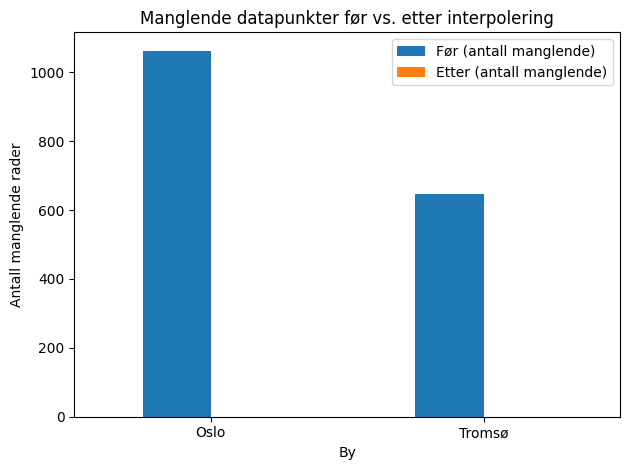

In [3]:
# Filstier før og etter interpolering
oslo_raw_file = "../../data/processed/vaerdata_oslo.csv"
oslo_imputed_file = "../../data/processed/vaerdata_oslo_imputert.csv"
tromso_raw_file = "../../data/processed/vaerdata_tromso.csv"
tromso_imputed_file = "../../data/processed/vaerdata_tromso_imputert.csv"

# Manglende rader før interpolering
analyzer_raw = MissingWeatherDataAnalyzer(
    oslo_path=oslo_raw_file,
    tromso_path=tromso_raw_file,
    output_dir=None,
)
analyzer_raw.load_data()
analyzer_raw.identify_missing()
missing_before = analyzer_raw.df_missing

# --- Etter interpolering ---
analyzer_imp = MissingWeatherDataAnalyzer(
    oslo_path=oslo_imputed_file,
    tromso_path=tromso_imputed_file,
    output_dir=None,
)
analyzer_imp.load_data()
analyzer_imp.identify_missing()
missing_after = analyzer_imp.df_missing

# Raskt overblikk i DataFrame-form
summary_df = pd.DataFrame(
    {
        "Før (antall manglende)": missing_before.groupby("city").size(),
        "Etter (antall manglende)": missing_after.groupby("city").size(),
    }
).fillna(0).astype(int)
display(summary_df)

# Enkel visualisering
summary_df.plot(kind="bar")
plt.title("Manglende datapunkter før vs. etter interpolering")
plt.xlabel("By")
plt.ylabel("Antall manglende rader")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()